<div style="background-color:#769fcd;color:#FFFFFF;padding:20px;">
<h1>Capstone Project - The Battle of Neighborhoods</h1>
<h3>Best Location for a Restaurant in Istanbul, Turkey</h3>
<h3><em>IBM Data Science Professional Certificate - Suleyman PAYASLI</em></h3>
</div>
<div >
<h2>Table of contents</h2>
<ul>
<li><a href="#introduction">Introduction: Business Problem</a></li>
<li><a href="#data">Data</a></li>
<li><a href="#methodology">Methodology</a></li>
<li><a href="#analysis">Analysis</a></li>
<li><a href="#results">Results and Discussion</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>
</div>

<h2>1. Introduction: Business Problem</h2><a name="introduction"></a>

### 1.1 Background
Istanbul is the largest city in Turkey and the country's economic, cultural and historic center. The city which is the heart of the country, straddles the Bosphorus strait, and lies in both Europe and Asia, with a population of over 15 million residents, comprising 19% of the population of Turkey. Istanbul had the eleventh-largest economy among the world's urban areas in 2018, and is responsible for 30 percent of Turkey's industrial output. The city houses international ports that link Europe and Asia. 
Istanbul is divided into 39 districts in total, more than any other province in Turkey. The city has numerous shopping centers, from the historic to the modern and is also well known for its historic seafood restaurants. Istanbul offers wide range of quality restaurants in its every districts and neighborhoods. Restaurants serves up world cuisine as Turkish, Italian, Mediterranean, French, Japan, Chinese and Indian foods.

### 1.2 Business Problem
In this project we will try to find an optimal location for a restaurant. In particular, this report will be targeted to stakeholders interested in opening new restaurant business in Istanbul, Turkey. 

Since there are lots of restaurants in Istanbul we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no existing Turkish restaurants in vicinity. We would also prefer locations as close to the city center as possible, assuming that first two conditions are met. We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders. Objective of this study is to locate and recommend to those who wants to open a new restaurant in Istanbul which neighborhood will be best choice to start.

Consequently, the goal we want to reach with this project is to help a possible stakeholder to understand better the best possible boroughs (districts) for opening a restaurant with useful insights.

### 1.3 Target Audience
Entrepreneurs who are passionate about opening a restaurant in Istanbul would be very interested in this project. The project is also for business owners and stakeholders who want to expand their businesses and wonder how data science could be applied to the questions at hand. Another target audience would be foreign tourists and city visitors who wants to know where to find seafood or Turkish cuisine restaurants.

<h2>2. Data</h2><a name="data"></a>

Following data sources will be needed to extract or generate the required information:

**Districts of Istanbul:** the list of districts of Istanbul can be obtained from a Wikipedia page. We have to scrape the data.
Here, you will find a HTML table which shows the 39 districts of Istanbul:

[List of districts of Istanbul](https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul)

<img src="./images/wikipedia_districts_of_istanbul.jpg" align="left" width="600">

**Location Data:** The location data of districts will be obtained from Geocoder API. This API provides geographic coordinates as latitude and longitude, which we can use to place markers on a map.

**Foursquare API:** We will look for the most common venues list, number of restaurants, their type, and location in every neighborhood will be obtained from Foursquare API. This allows us to make calls to the API to explore a region depending on the latitude and longitude, categories, radius and limit when calling the API.

With the datasets mentioned above, we will answer the following questions:<br>
- What are the most popular venues?
- What neighborhoods have more restaurants?
- What is best the location in Istanbul to open a restaurant?
- What areas have the potential to open a restaurant?



Then we will combine all these data sources and we will provide the distribution and density of the restaurant categories. After that we will try to classify the districts into clusters in order to see if we are getting some patterns. Finally we will try to find out some interesting insights which might be useful to investors, tourists or to people with business interests. So we will get a glimpse of the Restaurants in Istanbul and hopefully visualize the results on map.

### 2.1 Gather Data

**Import required libraries:**

In [1]:
import pandas as pd  # library for data analsysis
import numpy as np  # library to handle data in a vectorized manner
import requests  # library to handle requests
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
import folium  # map rendering library
from pandas import json_normalize  # transform JSON file into a pandas dataframe
from sklearn.cluster import KMeans  # import k-means from clustering stage
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns  # statistical data visualization library
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from folium.plugins import HeatMap

print('Libraries imported.')

Libraries imported.


### Scrap districts of Istanbul from wiki page
Use Webscraping to extract the list of districts of Istanbul data.

In [2]:
# Download list of districts in Istanbul with simple statistics from wikipedia
url = "https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul"

# Read html table into dataframe
df_districts = pd.read_html(url)[0]

# Removing unneceserry information

# Dropping last 4 rows
df_districts.drop(df_districts.tail(4).index, inplace=True)
# Remove columns 2, 3 and 4
df_districts.drop(df_districts.columns[2:5], axis=1, inplace=True)
# Rename columns
df_districts.rename(
    columns={'Population (2020)': 'Population', 'Annual household income TL(USD)': 'Income($)'}, inplace=True)


# Clean last column
df_districts['Income($)'] = df_districts['Income($)'].str.replace(
    r'[^(]*\(|\)[^)]*', '').str.replace(',', '').str.replace('.', '').str.replace('$', '')

df_districts['Income($)'] = df_districts['Income($)'].astype(int)

# Showing the dimension
print(df_districts.shape)
# Printing dataframe
df_districts

(39, 3)


,District,Population,Income($)
0,Adalar,16033,10978
1,Arnavutköy,296709,3350
2,Ataşehir,422594,10854
3,Avcılar,436897,6064
4,Bağcılar,737206,5295
5,Bahçelievler,592371,7741
6,Bakırköy,226229,14650
7,Başakşehir,469924,7474
8,Bayrampaşa,269950,5764
9,Beşiktaş,176513,17490


###  2.2 Adding Latitude and Longitude to the DataFrame

Let's get the coordinates of all districts using geocoder class of Geopy client as follow:

In [3]:
# Define a unique user_agent
geolocator = Nominatim(user_agent="istanbul_explorer")

# Adding "Istanbul" for finding the correct lat and long for the districts and only get results in Istanbul
df_districts["Area"] = df_districts["District"].apply(lambda x: "{}{}".format(x, ", Istanbul"))

# Add a column for the geocodes 'Area_Coordinates'.
# Use the geolocator to populate the geocodes for each address.
df_districts['Area_Coordinates'] = df_districts['Area'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

# Extract latitude and longitude to their own columns.
df_districts[['Latitude', 'Longitude']] = df_districts['Area_Coordinates'].apply(pd.Series)

# Drop columns
df_districts.drop(['Area'], axis=1, inplace=True)
df_districts.drop(['Area_Coordinates'], axis=1, inplace=True)

# Afte cleaning create a new dataframe for easy use.
df_istanbul = df_districts

print(# Showing the dimension
df_istanbul.shape)
# Showing the dataframe
df_istanbul.head()

(39, 5)


,District,Population,Income($),Latitude,Longitude
0,Adalar,16033,10978,40.876259,29.091027
1,Arnavutköy,296709,3350,41.184471,28.741245
2,Ataşehir,422594,10854,40.984749,29.106720
3,Avcılar,436897,6064,40.980135,28.717547
4,Bağcılar,737206,5295,41.033899,28.857898


Obtaining geographical coordiantes of Istanbul:

In [4]:
ist_address = 'ISTANBUL, TR'

# Define a unique user_agent
geolocator = Nominatim(user_agent="istanbul_explorer")

# Retrieve Istanbul's latitude and longitude coordinates.
location = geolocator.geocode(ist_address)
ist_latitude = location.latitude
ist_longitude = location.longitude
print('The geograpical coordinate of Istanbul are [{}, {}].'.format(ist_latitude, ist_longitude))

The geograpical coordinate of Istanbul are [41.0096334, 28.9651646].


###  2.3 Visualization of Istanbul's districs

In [5]:
# Create map of Istanbul using latitude and longitude values
map_istanbul = folium.Map(location=[ist_latitude, ist_longitude], zoom_start=10)

# Add markers to the map.
for lat, lng, district, population, income in zip(df_istanbul['Latitude'], df_istanbul['Longitude'], df_istanbul['District'], df_istanbul['Population'], df_istanbul['Income($)']):
    label = '[{}] Population: {} Income: ${}'.format(district, population, income)
    label = folium.Popup(label, parse_html=True, max_width=300)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul)

map_istanbul

<img src="./images/map_istanbul.jpg" align="left">

### 2.4 Using Foursquare API to explore the districts of Istanbul

####  Define Foursquare Credentials and Version

In [ ]:
# Foursquare API config
CLIENT_ID = ''      # your Foursquare ID
CLIENT_SECRET = ''  # your Foursquare Secret
VERSION = '20180605'  # Foursquare API version
LIMIT = 100  # Number of results to return

print('Your credentails:')
print('CLIENT_ID: {}'.format(CLIENT_ID))
print('CLIENT_SECRET: {}'.format(CLIENT_SECRET))

Define a function to obtain the information of the venues, with a limit of 100 and a radius of 2000 meters.

In [6]:
def get_venues(boroughs, latitudes, longitudes, limit=100, radius=2000):
    venues_list = []
    try:
        for name, lat, lng in zip(boroughs, latitudes, longitudes):
            print("Retrieving venues of", name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                lat,
                lng,
                radius,
                LIMIT)

            # make the GET request
            results = requests.get(url, headers={
                                'Accept-Language': 'Turkish'}).json()["response"]['groups'][0]['items']

            # Information for each venue
            venues_list.append([(
                name,
                lat,
                lng,
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['categories'][0]['name']) for v in results])

        venues = pd.DataFrame(
            [item for venue_list in venues_list for item in venue_list])
        venues.columns = ['District',
                        'Latitude',
                        'Longitude',
                        'VenueName',
                        'VenueLatitude',
                        'VenueLongitude',
                        'VenueCategory']

    except:
        venues_list = []
        print(f'\nError on {url}\n or error occured while retrieving venues.')
    
    return(venues)

Get the venue names and store it in a dataframe:

In [7]:
ist_venues = get_venues(boroughs=df_istanbul['District'],
                        latitudes=df_istanbul['Latitude'],
                        longitudes=df_istanbul['Longitude'])

# Showing the dimension
print(ist_venues.shape)
# Showing the dataframe
ist_venues.head()

(3796, 7)


,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Adalar,40.876259,29.091027,İnönü Evi Müzesi,40.878251,29.093647,History Museum
1,Adalar,40.876259,29.091027,Merit Halki Palace Hotel,40.878802,29.090974,Hotel
2,Adalar,40.876259,29.091027,L'isola Guesthouse,40.877038,29.096136,Bed & Breakfast
3,Adalar,40.876259,29.091027,Luz Café,40.877528,29.097877,Café
4,Adalar,40.876259,29.091027,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant


<h2>3. Methodology</h2><a name="methodology"></a>

Firstly, we obtained dataset containing list of districts of Istanbul from the web page [list of districts of Istanbul](https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul) using pandas to pull necessary data through the webpage. It is a quick and convenient way to turn an HTML table into a pandas data frame.

Secondly, we obtained geographical coordinates of Istanbul using the geocoder package. We fetched geographical coordinates of districts as latitude and longitude.

Thirdly, we visualized the location of districts of Istanbul to have a general understanding of the location.

Furthermore, we defined Foursquare API credentials to make API calls in order to explore each neighbourhood and returned the top 100 venues within radius of 2000 meters for each district. The extracted venue categories will be encoded using one-hot encoding to handle any categorical values in the dataset. We can perform one hot encoding on the obtained dataset and use it to find the 10 most common venue category in each district. Then clustering can be performed on the dataset. To determine the optimal number of clusters, we will use the "Elbow" method at the beginning, but if the results are not good enough we can use Silhouette coefficients or another else methods for better vision.

We will use K-Nearest Neighbor clustering technique to find the optimal number of clusters and then we set up the cluster algorithm for the optimum K value. So that we run k-means to cluster the neighborhoods. The clusters obtained can be analyzed to find the major type of venue categories in each cluster. This data can be used to suggest business people, suitable locations based on the category.

### Venue exploring

Top 20 Venue Category in City

In [8]:
ist_venues['VenueCategory'].value_counts().head(20)

Café                    546
Turkish Restaurant      173
Restaurant              163
Coffee Shop             156
Dessert Shop            104
Seafood Restaurant      101
Gym / Fitness Center    101
Gym                      92
Hotel                    91
Steakhouse               91
Bakery                   87
Kebab Restaurant         64
Park                     48
Breakfast Spot           46
Ice Cream Shop           45
Pizza Place              44
Beach                    37
Art Gallery              34
Fast Food Restaurant     34
Hookah Bar               33
Name: VenueCategory, dtype: int64

We will filter out all the restaurant venues from this set.

In [9]:
# Filter the resturants
ist_venues_only_restaurant = ist_venues[ist_venues['VenueCategory'].str.contains('Restaurant')].reset_index(drop=True)
ist_venues_only_restaurant.index = np.arange(1, len(ist_venues_only_restaurant )+1)
print("We have {} restaurants registered on Foursquare.".format(ist_venues_only_restaurant.shape[0]))
ist_venues_only_restaurant.head()

We have 677 restaurants registered on Foursquare.


,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,Adalar,40.876259,29.091027,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant
2,Adalar,40.876259,29.091027,Erguvan Evyemekleri,40.876864,29.100745,Turkish Restaurant
3,Adalar,40.876259,29.091027,Heybeliada Deniz Lisesi Kolaylık Tesisleri,40.870648,29.097261,Restaurant
4,Adalar,40.876259,29.091027,Zehra Heybeliada,40.877453,29.100646,Seafood Restaurant
5,Adalar,40.876259,29.091027,Terk-i Dunya Restaurant,40.878181,29.100289,Seafood Restaurant


In [10]:
restaurant_latlons = ist_venues_only_restaurant[['Latitude', 'Longitude']]
restaurant_latlons.head()

,Latitude,Longitude
1,40.876259,29.091027
2,40.876259,29.091027
3,40.876259,29.091027
4,40.876259,29.091027
5,40.876259,29.091027


Number of restaurants by category

In [11]:
ist_venues_only_restaurant['VenueCategory'].value_counts()

Turkish Restaurant                 173
Restaurant                         163
Seafood Restaurant                 101
Kebab Restaurant                    64
Fast Food Restaurant                34
Comfort Food Restaurant             21
Doner Restaurant                    21
Kokoreç Restaurant                  15
Turkish Home Cooking Restaurant     13
Mediterranean Restaurant            12
Italian Restaurant                  11
Middle Eastern Restaurant            9
Vegetarian / Vegan Restaurant        4
Theme Restaurant                     3
Tantuni Restaurant                   3
Chinese Restaurant                   3
Sushi Restaurant                     3
Eastern European Restaurant          3
French Restaurant                    3
Greek Restaurant                     2
Mexican Restaurant                   2
American Restaurant                  2
Halal Restaurant                     1
Arepa Restaurant                     1
Argentinian Restaurant               1
Afghan Restaurant        

In [12]:
print('There are {} unique categories.'.format(len(ist_venues_only_restaurant['VenueCategory'].unique())))

There are 34 unique categories.


<h2>4. Analysis</h2><a name="analysis"></a>

### 4.1 Explanatory data analysis
Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the number of restaurants like top-10 in every district and then visualize the data.

In [13]:
# create a dataframe of top 10 categories
ist_venues_top10 = ist_venues_only_restaurant['VenueCategory'].value_counts()[0:10].to_frame(name='frequency')
ist_venues_top10 = ist_venues_top10.reset_index()
ist_venues_top10.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)
ist_venues_top10

,VenueCategory,Frequency
0,Turkish Restaurant,173
1,Restaurant,163
2,Seafood Restaurant,101
3,Kebab Restaurant,64
4,Fast Food Restaurant,34
5,Comfort Food Restaurant,21
6,Doner Restaurant,21
7,Kokoreç Restaurant,15
8,Turkish Home Cooking Restaurant,13
9,Mediterranean Restaurant,12


Visualize top-10 restaurant categories

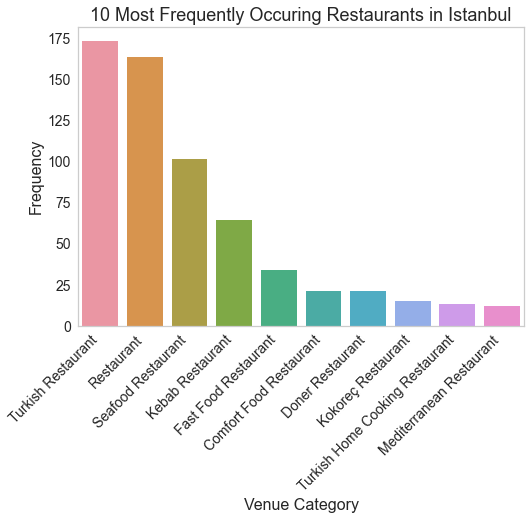

In [14]:
s=sns.barplot(x="VenueCategory", y="Frequency", data=ist_venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in Istanbul', fontsize=18)
plt.xlabel("Venue Category", fontsize=16)
plt.ylabel ("Frequency", fontsize=16)
plt.grid(False)
plt.yticks(fontsize=14)  # changing the fontsize of yticks
plt.xticks(fontsize=14)  # changing the fontsize of xticks
plt.show()
plt.close()

As shown from the bar chart, Turkish, Seafood and Kebab restaurants are at the top. I think this is the expected result.

In [15]:
print("Shape of the Dataframe with Venue Category only Restaurant: ", ist_venues_only_restaurant.shape)
ist_venues_only_restaurant.head(77)

Shape of the Dataframe with Venue Category only Restaurant:  (677, 7)


,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,Adalar,40.876259,29.091027,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant
2,Adalar,40.876259,29.091027,Erguvan Evyemekleri,40.876864,29.100745,Turkish Restaurant
3,Adalar,40.876259,29.091027,Heybeliada Deniz Lisesi Kolaylık Tesisleri,40.870648,29.097261,Restaurant
4,Adalar,40.876259,29.091027,Zehra Heybeliada,40.877453,29.100646,Seafood Restaurant
5,Adalar,40.876259,29.091027,Terk-i Dunya Restaurant,40.878181,29.100289,Seafood Restaurant
...,...,...,...,...,...,...,...
73,Avcılar,40.980135,28.717547,Balık Ekmekçi Aziz Usta,40.973031,28.712284,Seafood Restaurant
74,Avcılar,40.980135,28.717547,Karadeniz Sofrası,40.978809,28.723599,Turkish Restaurant
75,Avcılar,40.980135,28.717547,Konak Fırın & Restaurant,40.981214,28.722083,Theme Restaurant
76,Avcılar,40.980135,28.717547,Park İşkembe,40.982019,28.709956,Comfort Food Restaurant


In [16]:
ist_venues_restaurant = ist_venues_only_restaurant.groupby(['District'])['VenueCategory'].apply(lambda x: x[x.str.contains('Restaurant')].count())
ist_venues_restaurant

District
Adalar           30
Arnavutköy       10
Ataşehir         24
Avcılar          12
Bahçelievler     11
Bakırköy         21
Bayrampaşa       23
Bağcılar         11
Başakşehir       22
Beykoz           21
Beylikdüzü       21
Beyoğlu          18
Beşiktaş          6
Büyükçekmece     25
Esenler          16
Esenyurt         15
Eyüpsultan       19
Fatih            17
Gaziosmanpaşa    20
Güngören         20
Kadıköy          10
Kartal           27
Kağıthane        16
Küçükçekmece     18
Maltepe          13
Pendik           16
Sancaktepe       18
Sarıyer          25
Silivri          18
Sultanbeyli      24
Sultangazi        5
Tuzla            18
Zeytinburnu      19
Çatalca          15
Çekmeköy         18
Ümraniye         15
Üsküdar          13
Şile             13
Şişli            14
Name: VenueCategory, dtype: int64

Let's check how many restaurant venues were returned for each district and sort them in count:

In [17]:
summary = ist_venues_only_restaurant.groupby('District').count().reset_index()
summary['Count'] = summary['VenueName']
summary = summary.drop(['Latitude', 'Longitude', 'VenueName',
                        'VenueLatitude', 'VenueLongitude', 'VenueCategory'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,District,Count
0,Sultangazi,5
1,Beşiktaş,6
2,Arnavutköy,10
3,Kadıköy,10
4,Bahçelievler,11


Visualize the number of restaurants for each neighborhood:

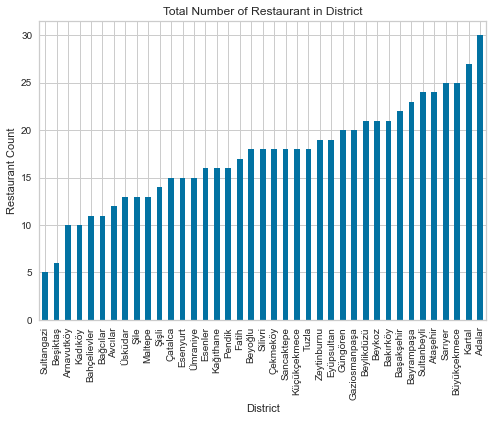

<Figure size 432x288 with 0 Axes>

In [18]:
# We can create a bar chart and analyze the big picture of it
objects = summary.District
y_pos = np.arange(len(objects))

summary.plot(kind='bar', x='District', y='Count', legend=False)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('Restaurant Count')
plt.title('Total Number of Restaurant in District')
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.show()
plt.close()

We can see that Adalar, Kartal, Büyükçekmece, Sarıyer, Ataşehir, Sultanbeyli, Bayrampaşa, Başakşehir, Bakırköy, Beykoz and Beylikdüzü boroughs are above 20 venues in our given coordinates.

Use geopy library to get the longitude and latitude values of **Istanbul City Center**

In [19]:
# Get the longitude and latitude values of Istanbul City Center.
istcc_address = "Taksim Square, Istanbul, Turkey"
# Define a unique user_agent
geolocator = Nominatim(user_agent="istanbul_explorer")

# Retrieve Istanbul's latitude and longitude coordinates.
location = geolocator.geocode(istcc_address)
istcc_latitude = location.latitude
istcc_longitude = location.longitude
print('The geograpical coordinate of Istanbul Center are {}, {}.'.format(istcc_latitude, istcc_longitude))

The geograpical coordinate of Istanbul Center are 41.0369635, 28.9851445.


### 4.2 Heatmap
Let's create a heatmap showing the density of restaurants and try to extract some meaningful info from that. Also, we will add a few circles indicating distance of 2km, 5km, 10km, 15km and 20km from city center.

In [20]:
restaurant_latlons = ist_venues_only_restaurant[['Latitude', 'Longitude']]

# create map
map_ist_heat = folium.Map(location=[ist_latitude, ist_longitude], zoom_start=10)

folium.TileLayer('cartodbpositron').add_to(map_ist_heat)

HeatMap(restaurant_latlons).add_to(map_ist_heat)

folium.Marker([istcc_latitude, istcc_longitude]).add_to(map_ist_heat)
# Adding circles indicating distance of 2km, 5km, 10km, 15km and 20km from city center.
folium.Circle([istcc_latitude, istcc_longitude], radius=2000, fill=False, color='white').add_to(map_ist_heat)
folium.Circle([istcc_latitude, istcc_longitude], radius=5000, fill=False, color='white').add_to(map_ist_heat)
folium.Circle([istcc_latitude, istcc_longitude], radius=10000, fill=False, color='white').add_to(map_ist_heat)
folium.Circle([istcc_latitude, istcc_longitude], radius=15000, fill=False, color='white').add_to(map_ist_heat)
folium.Circle([istcc_latitude, istcc_longitude], radius=20000, fill=False, color='white').add_to(map_ist_heat)

map_ist_heat

<img src="./images/heatmap.jpg" align="left">

In [21]:
ist_venues_restaurant_df = ist_venues_restaurant.to_frame().reset_index()
ist_venues_restaurant_df.columns = ['District', 'Number of Restaurant']
ist_venues_restaurant_df.index = np.arange(1, len(ist_venues_restaurant)+1)
list_rest_no = ist_venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = ist_venues_restaurant_df['District'].to_list()

### 4.3 One hot encoding for analysing the venues of each district 

In [22]:
# one hot encoding
ist_onehot = pd.get_dummies(ist_venues_only_restaurant[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ist_onehot['District'] = ist_venues_only_restaurant['District'] 

# move neighborhood column to the first column
fixed_columns = [ist_onehot.columns[-1]] + list(ist_onehot.columns[:-1])
ist_onehot = ist_onehot[fixed_columns]

ist_onehot.head()

,District,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,...,Restaurant,Seafood Restaurant,Sushi Restaurant,Tantuni Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
1,Adalar,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Adalar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Adalar,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Adalar,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,Adalar,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
# New dataframe size.
ist_onehot.shape

(677, 35)

**Grouping by districts and showing the mean of the frequency of occurrence for each category of restaurants.**

In [24]:
ist_grouped = ist_onehot.groupby('District').mean().reset_index()
print("Shape: ", ist_grouped.shape)
ist_grouped.head(10)

Shape:  (39, 35)


,District,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,...,Restaurant,Seafood Restaurant,Sushi Restaurant,Tantuni Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adalar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.133333,0.633333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.000000
1,Arnavutköy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.300000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.100000,0.500000,0.000000
2,Ataşehir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,...,0.416667,0.083333,0.000000,0.000000,0.0,0.000000,0.0,0.041667,0.083333,0.000000
3,Avcılar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.333333,0.083333,0.000000,0.000000,0.0,0.083333,0.0,0.000000,0.083333,0.000000
4,Bahçelievler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.090909,0.181818,0.000000,0.000000,0.0,0.000000,0.0,0.090909,0.181818,0.000000
5,Bakırköy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.285714,0.047619,0.047619,0.000000,0.0,0.000000,0.0,0.047619,0.238095,0.000000
6,Bayrampaşa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130435,...,0.043478,0.043478,0.000000,0.043478,0.0,0.000000,0.0,0.000000,0.434783,0.043478
7,Bağcılar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.272727,0.000000
8,Başakşehir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.227273,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.181818,0.000000
9,Beykoz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,...,0.238095,0.285714,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.095238,0.000000


Print the neighbourhoods with their respective top 5 most common venues.

In [25]:
num_top_venues = 5

for hood in ist_grouped['District']:
    print("----"+hood+"----")
    temp = ist_grouped[ist_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adalar----
                      venue  freq
0        Seafood Restaurant  0.63
1                Restaurant  0.13
2        Turkish Restaurant  0.10
3      Fast Food Restaurant  0.10
4  Mediterranean Restaurant  0.03


----Arnavutköy----
                             venue  freq
0               Turkish Restaurant   0.5
1                       Restaurant   0.3
2  Turkish Home Cooking Restaurant   0.1
3             Fast Food Restaurant   0.1
4                Afghan Restaurant   0.0


----Ataşehir----
                venue  freq
0          Restaurant  0.42
1    Kebab Restaurant  0.21
2  Turkish Restaurant  0.08
3  Seafood Restaurant  0.08
4    Doner Restaurant  0.04


----Avcılar----
                     venue  freq
0               Restaurant  0.33
1  Comfort Food Restaurant  0.17
2         Doner Restaurant  0.08
3       Seafood Restaurant  0.08
4       Turkish Restaurant  0.08


----Bahçelievler----
                             venue  freq
0               Turkish Restaurant  0.18
1     

### 4.4 Filter the most Common Venues

First, let's write a function to sort the venues in descending order.

In [26]:
# Function to return the most common venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Let's put that into a pandas dataframe**

Now let's create the new dataframe and display the top 10 venues for each district.

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['District'] = ist_grouped['District']

for ind in np.arange(ist_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ist_grouped.iloc[ind, :], num_top_venues)

print(boroughs_venues_sorted.shape)
boroughs_venues_sorted.head()

(39, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant,Arepa Restaurant
1,Arnavutköy,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant
2,Ataşehir,Restaurant,Kebab Restaurant,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Turkish Home Cooking Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant
3,Avcılar,Restaurant,Comfort Food Restaurant,Turkish Restaurant,Theme Restaurant,Kebab Restaurant,Doner Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Eastern European Restaurant
4,Bahçelievler,Turkish Restaurant,Italian Restaurant,Seafood Restaurant,Comfort Food Restaurant,Turkish Home Cooking Restaurant,Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant


### 4.5 Cluster the Neighborhoods
**Find the optimal number of clusters:**<br>
K-Means algorithm is one of the most common cluster method of **unsupervised learning**. We will run the k-Means algorithm to build a clustering model with a different number of clusters (k).

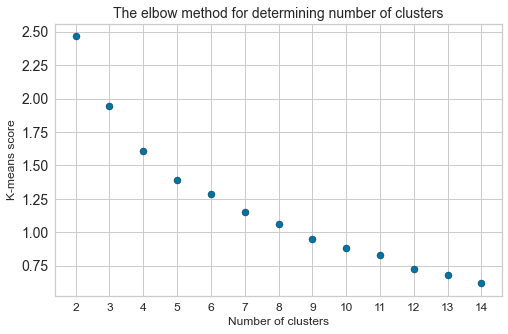

In [28]:
# Finding the best number of clusters with the elbow method for clustering the unlabeled district data by venues.
ist_clustering = ist_grouped.drop('District', 1)

km_scores = []

for i in range(2, 15):
    km = KMeans(n_clusters=i, max_iter=300).fit(ist_clustering)
    preds = km.predict(ist_clustering)
    km_scores.append(-km.score(ist_clustering))

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.scatter(x=[i for i in range(2, 15)], y=km_scores, s=50, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=12)
plt.ylabel("K-means score", fontsize=12)
plt.title("The elbow method for determining number of clusters", fontsize=14)
plt.xticks([i for i in range(2, 15)], fontsize=12)
plt.yticks(fontsize=14)
plt.show()
plt.close()

To determine the optimal number of clusters, we used the “Elbow” method at the beginning, but the result doesn't good enough since the slope of distortion doesn't have significant change among different numbers of clusters. So we can use Silhouette and Calinski-Harabasz Index methods for better vision.

**Silhouette score** is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples.

**Calculate Silhouette Score for K-Means Clusters**

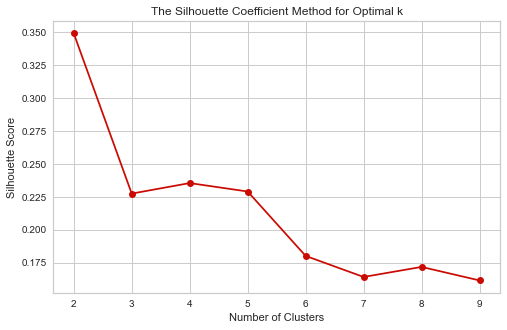

In [29]:
max_score = 10
scores = []

for kclusters in range(2, max_score):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, random_state = 1).fit_predict(ist_clustering)    
    # Calculate silhouette score
    score = silhouette_score(ist_clustering, kmeans)
    scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, max_score), scores, 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.title('The Silhouette Coefficient Method for Optimal k');
plt.show()

As seen from the above line plot, we can see the best number of clusters is 3.

**KElbowVisualizer** visualizes the clusters according to a scoring function, looking for an "elbow" in the curve. In the following code, we'll use the *calinski_harabasz score* and hide the time to fit the model.

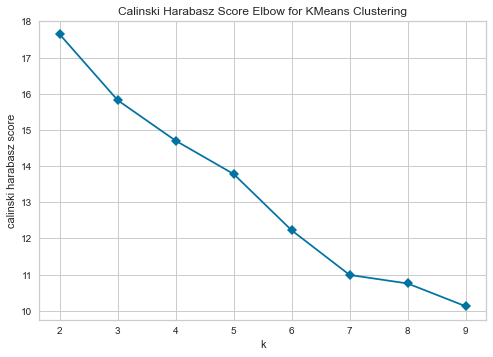

In [30]:
kclusters = (2, 10)    # cluster range values

# Instantiate the k-means clustering model
model = KMeans(random_state=1)
# Instantiate visualizer
visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False, locate_elbow=False)

visualizer.fit(ist_clustering) # Fit the data to the visualizer
visualizer.show()              # Finalize and render the figure

We can inspect that the best k value for this task is 3.Hence, we will have 3 cluster neighborhoods at the end.
By contrast, Silhouette and Calinski-Harabasz Index method provide a better insight under this context and it works better.

### 4.6 Setting up the cluster algorithm
We see that the optimum K value is 3 so we will have a resulting of 3 clusters. So that we run k-means to cluster the neighborhood into 3 clusters.

In [31]:
# Set number of clusters
kclusters = 3

ist_clustering = ist_grouped.drop('District', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ist_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2])

Let's create a new dataframe 'ist_merged' that includes the cluster as well as the top 10 venues for each district.

In [32]:
ist_merged = df_istanbul

# Set Cluster labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# add clustering labels
#ist_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ist_merged = ist_merged.join(boroughs_venues_sorted.set_index('District'), on='District')

#ist_merged = ist_merged.dropna().reset_index(drop=True)
ist_merged.head()  # check the last columns!

,District,Population,Income($),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,16033,10978,40.876259,29.091027,1,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant,Arepa Restaurant
1,Arnavutköy,296709,3350,41.184471,28.741245,0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant
2,Ataşehir,422594,10854,40.984749,29.106720,2,Restaurant,Kebab Restaurant,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Turkish Home Cooking Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant
3,Avcılar,436897,6064,40.980135,28.717547,2,Restaurant,Comfort Food Restaurant,Turkish Restaurant,Theme Restaurant,Kebab Restaurant,Doner Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Eastern European Restaurant
4,Bağcılar,737206,5295,41.033899,28.857898,0,Kebab Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,French Restaurant,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant


We can also estimate the number of 1st Most Common Venue in each cluster.Thus, we can create a bar chart which may help us to find proper label names for each cluster.

In [33]:
count_venue = ist_merged
# drop columns
count_venue = count_venue.drop(['District','Population', 'Income($)', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Kebab Restaurant,Restaurant,Seafood Restaurant,Turkish Restaurant
0,1,1,0,17
1,0,0,7,0
2,1,12,0,0


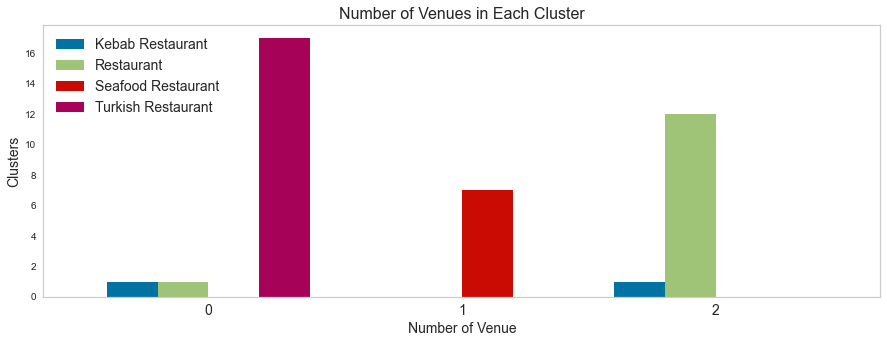

In [34]:
# creating a bar chart as number of venues in each cluster
frame=cv_cluster.plot(kind='bar', figsize=(15,5), width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.grid(False)
plt.show()
plt.close()

### 4.8 Map of Cluster Results
Finally, let's visualize the resulting clusters.

In [36]:
# create map
map_clusters = folium.Map(location=[ist_latitude, ist_longitude], zoom_start=9, tiles='cartodbpositron')

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(ist_merged['Latitude'], 
                                  ist_merged['Longitude'], 
                                  ist_merged['District'], 
                                  ist_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="./images/map_clusters.jpg" align="left">

### 4.9 Explore the Clusters
Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

### Cluster 1 (Red)

In [37]:
ist_merged.loc[ist_merged['Cluster Labels'] == 0, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arnavutköy,0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant
4,Bağcılar,0,Kebab Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,French Restaurant,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant
5,Bahçelievler,0,Turkish Restaurant,Italian Restaurant,Seafood Restaurant,Comfort Food Restaurant,Turkish Home Cooking Restaurant,Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant
8,Bayrampaşa,0,Turkish Restaurant,Comfort Food Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Kokoreç Restaurant,Restaurant,Middle Eastern Restaurant,Tantuni Restaurant,Fast Food Restaurant
9,Beşiktaş,0,Turkish Restaurant,French Restaurant,Kebab Restaurant,Falafel Restaurant,Chinese Restaurant,Doner Restaurant,Fast Food Restaurant,Eastern European Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant
13,Büyükçekmece,0,Turkish Restaurant,Restaurant,Seafood Restaurant,Kebab Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Turkish Home Cooking Restaurant,Italian Restaurant,Kokoreç Restaurant,Doner Restaurant
14,Çatalca,0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Sushi Restaurant,Fast Food Restaurant,Chinese Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant
15,Çekmeköy,0,Turkish Restaurant,Restaurant,Middle Eastern Restaurant,Doner Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant
18,Eyüpsultan,0,Turkish Restaurant,Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Tantuni Restaurant,American Restaurant,Bosnian Restaurant
19,Fatih,0,Turkish Restaurant,Restaurant,Kebab Restaurant,Mediterranean Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dumpling Restaurant


In [38]:
cluster1 = ist_merged.loc[ist_merged['Cluster Labels'] == 0, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]
cluster1['1st Most Common Venue'].value_counts()

Turkish Restaurant    17
Restaurant             1
Kebab Restaurant       1
Name: 1st Most Common Venue, dtype: int64

In [39]:
cluster1 = ist_merged.loc[ist_merged['Cluster Labels'] == 0, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]
venues1_temp = (cluster1['1st Most Common Venue'].append(cluster1['2nd Most Common Venue']).append(cluster1['3rd Most Common Venue']))
venues1_temp.value_counts().head()

Turkish Restaurant         19
Restaurant                 13
Kebab Restaurant            7
Seafood Restaurant          6
Comfort Food Restaurant     3
dtype: int64

In [40]:
cluster1 = ist_merged.loc[ist_merged['Cluster Labels'] == 0, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

venues1.value_counts().head(10)

Turkish Restaurant               19
Restaurant                       17
Doner Restaurant                 13
Fast Food Restaurant             13
Kebab Restaurant                 12
Seafood Restaurant               11
Eastern European Restaurant      10
Comfort Food Restaurant           8
Dumpling Restaurant               7
Vegetarian / Vegan Restaurant     7
dtype: int64

Let's visulaize the top 5 most common venue categories in each of the cluster 1.

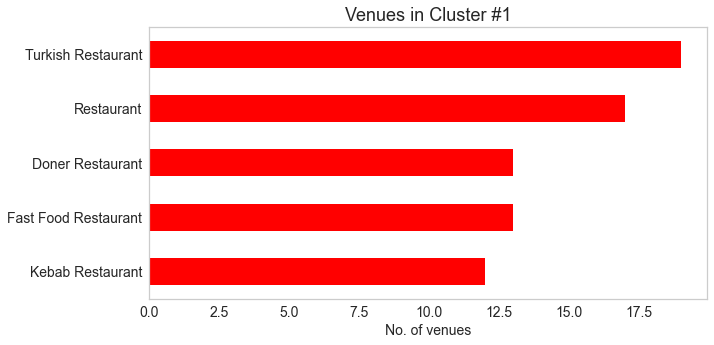

In [41]:
cluster1_data= venues1.value_counts().head()

# generate plot
ax = cluster1_data.plot(kind='barh', figsize=(10,5), color='red')

ax.invert_yaxis()   # labels read top-to-bottom
ax.set_title("Venues in Cluster #1", fontsize=18)
ax.set_xlabel("No. of venues", fontsize=14)
plt.grid(False)
plt.yticks(fontsize=14)  # changing the fontsize of yticks
plt.xticks(fontsize=14)  # changing the fontsize of xticks
# show plot
plt.show()
plt.close()

Most of the districts labeled as cluster 1 (0 in code and table) have Turkish Restaurants as the most common restaurant type. So we can assume that this cluster represents Turkish Restaurants. The neighborhoods in cluster 1 has the greatest number of Turkish Restaurants, hence opening one here is not the best choice. 

### Cluster 2 (Purple)

In [42]:
ist_merged.loc[ist_merged['Cluster Labels'] == 1, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,1,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,Caucasian Restaurant,Arepa Restaurant
10,Beykoz,1,Seafood Restaurant,Restaurant,Comfort Food Restaurant,Turkish Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Doner Restaurant,Kebab Restaurant,Kokoreç Restaurant,Eastern European Restaurant
22,Kadıköy,1,Seafood Restaurant,Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Asian Restaurant,Kebab Restaurant,Kokoreç Restaurant,Chinese Restaurant,Eastern European Restaurant,Dumpling Restaurant
29,Sarıyer,1,Seafood Restaurant,Turkish Restaurant,Restaurant,Kebab Restaurant,American Restaurant,Kokoreç Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant
30,Silivri,1,Seafood Restaurant,Turkish Restaurant,Restaurant,Kokoreç Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Eastern European Restaurant
33,Şile,1,Seafood Restaurant,Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Bosnian Restaurant,American Restaurant
35,Tuzla,1,Seafood Restaurant,Restaurant,Kebab Restaurant,Mediterranean Restaurant,Chinese Restaurant,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Comfort Food Restaurant


In [43]:
cluster2 = ist_merged.loc[ist_merged['Cluster Labels'] == 1, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]
cluster2['1st Most Common Venue'].value_counts()

Seafood Restaurant    7
Name: 1st Most Common Venue, dtype: int64

In [44]:
cluster2 = ist_merged.loc[ist_merged['Cluster Labels'] == 1, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]
venues2_temp = (cluster2['1st Most Common Venue'].append(cluster2['2nd Most Common Venue']))
venues2_temp.value_counts()

Seafood Restaurant    7
Restaurant            5
Turkish Restaurant    2
dtype: int64

In [45]:
cluster2 = ist_merged.loc[ist_merged['Cluster Labels'] == 1, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

venues2.value_counts().head(10)

Restaurant                         7
Seafood Restaurant                 7
Kebab Restaurant                   5
Eastern European Restaurant        5
Comfort Food Restaurant            5
Doner Restaurant                   4
Turkish Restaurant                 4
Fast Food Restaurant               4
Kokoreç Restaurant                 4
Turkish Home Cooking Restaurant    3
dtype: int64

Let's visulaize the top 5 most common venue categories in each of the cluster 2.

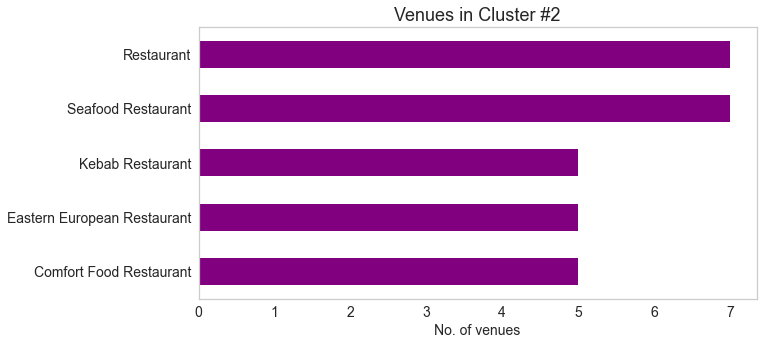

In [46]:
cluster2_data= venues2.value_counts().head()

# generate plot
ax = cluster2_data.plot(kind='barh', figsize=(10,5), color='purple')

ax.invert_yaxis()   # labels read top-to-bottom
ax.set_title("Venues in Cluster #2",  fontsize=18)
ax.set_xlabel("No. of venues",  fontsize=14)
plt.grid(False)
plt.yticks(fontsize=14)  # changing the fontsize of yticks
plt.xticks(fontsize=14)  # changing the fontsize of xticks
# show plot
plt.show()
plt.close()

All of the districts labeled as cluster 2 (1 in code and table) have Seafood Restaurants as the most common restaurant type. So we can assume that this cluster represents Seafood Restaurants. As seen from the clustering calculations and chart given above,
the neighborhoods 2 has notable number of seafood restaurants. Therefore, opening a new one here is not the best option.

### Cluster 3 (Green)

In [47]:
ist_merged.loc[ist_merged['Cluster Labels'] == 2, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ataşehir,2,Restaurant,Kebab Restaurant,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Turkish Home Cooking Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant
3,Avcılar,2,Restaurant,Comfort Food Restaurant,Turkish Restaurant,Theme Restaurant,Kebab Restaurant,Doner Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Eastern European Restaurant
6,Bakırköy,2,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Comfort Food Restaurant,Eastern European Restaurant
7,Başakşehir,2,Kebab Restaurant,Restaurant,Turkish Restaurant,Doner Restaurant,Seafood Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Eastern European Restaurant,Dumpling Restaurant
11,Beylikdüzü,2,Restaurant,Turkish Restaurant,Italian Restaurant,Kebab Restaurant,Doner Restaurant,Kokoreç Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant
12,Beyoğlu,2,Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Argentinian Restaurant,Caucasian Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Greek Restaurant,Thai Restaurant
16,Esenler,2,Restaurant,Turkish Restaurant,Kebab Restaurant,Tantuni Restaurant,Seafood Restaurant,Comfort Food Restaurant,Chinese Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant
17,Esenyurt,2,Restaurant,Turkish Restaurant,Kebab Restaurant,Doner Restaurant,Eastern European Restaurant,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant
21,Güngören,2,Restaurant,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Kokoreç Restaurant,Comfort Food Restaurant,Chinese Restaurant,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant
24,Kartal,2,Restaurant,Turkish Restaurant,Seafood Restaurant,Doner Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Kebab Restaurant,Sushi Restaurant,Fast Food Restaurant,Kokoreç Restaurant


In [48]:
cluster3 = ist_merged.loc[ist_merged['Cluster Labels'] == 2, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

cluster3['1st Most Common Venue'].value_counts()

Restaurant          12
Kebab Restaurant     1
Name: 1st Most Common Venue, dtype: int64

The list of the 1st and 2nd venues in cluster 3:

In [49]:
cluster3 = ist_merged.loc[ist_merged['Cluster Labels'] == 2, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

venues3_temp = (cluster3['1st Most Common Venue'].append(cluster3['2nd Most Common Venue']))

venues3_temp.value_counts()

Restaurant                       13
Turkish Restaurant                7
Kebab Restaurant                  2
Vegetarian / Vegan Restaurant     1
Tibetan Restaurant                1
Mediterranean Restaurant          1
Comfort Food Restaurant           1
dtype: int64

The list of the top 3 venues in cluster 3:

In [50]:
cluster3_top3 = cluster3['1st Most Common Venue'].append(cluster3['2nd Most Common Venue']).append(cluster3['3rd Most Common Venue'])

cluster3_top3.value_counts().head(10)

Restaurant                         13
Turkish Restaurant                 11
Kebab Restaurant                    5
Fast Food Restaurant                2
Italian Restaurant                  2
Turkish Home Cooking Restaurant     1
Vegetarian / Vegan Restaurant       1
Tibetan Restaurant                  1
Seafood Restaurant                  1
Mediterranean Restaurant            1
dtype: int64

In [51]:
cluster3 = ist_merged.loc[ist_merged['Cluster Labels'] == 2, ist_merged.columns[[0] + list(range(5, ist_merged.shape[1]))]]

venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

venues3.value_counts().head(10)

Restaurant                     13
Turkish Restaurant             13
Kebab Restaurant               11
Doner Restaurant               10
Eastern European Restaurant     9
Fast Food Restaurant            9
Seafood Restaurant              8
Chinese Restaurant              6
Comfort Food Restaurant         6
Italian Restaurant              5
dtype: int64

Let's visualize the *top 3 most common venue* categories in each of the cluster 3.

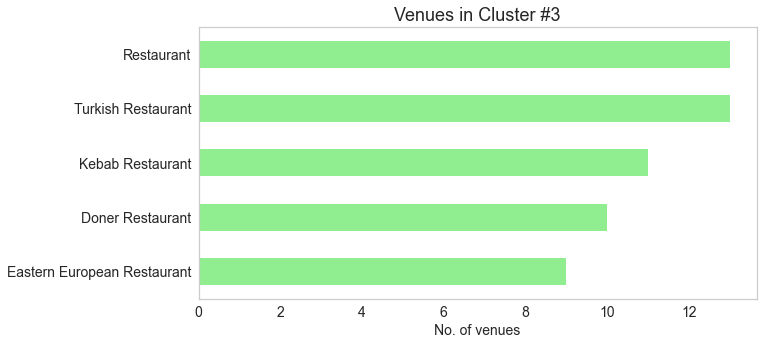

In [52]:
cluster3_data= venues3.value_counts().head()

# generate plot
ax = cluster3_data.plot(kind='barh', figsize=(10, 5), color='lightgreen')

ax.invert_yaxis()   # labels read top-to-bottom
ax.set_title("Venues in Cluster #3", fontsize=18)
ax.set_xlabel("No. of venues", fontsize=14)
plt.grid(False)
plt.yticks(fontsize=14)  # changing the fontsize of yticks
plt.xticks(fontsize=14)  # changing the fontsize of xticks
# show plot
plt.show()
plt.close()

It is not an esay task to interpret the 3rd cluster. At first glance, in 1st Most Common Venue, Restaurants seem to be ahead.
On the other hand, when considering all the most common venueus (from 1 to 10) there are Restaurants, Turkish Restaurants, Kebab, and Doner restaurants. It is seen that their numbers are approximately close to each other. You can observe that there are restaurants representing the main cuisines in this part of Istanbul. So with a simple approach, we can say that this cluster represents "mixed". Clearly, this cluster deserves a more detailed analysis.

<h2>5. Results and Discussion</h2><a name="results"></a>

We have got a glimpse of the Restaurants in Istanbul. Now in this case we are ready to find out some interesting insights which might be useful to stakeholders, investors or to people with business interests.

We used Foursquare API and we searched for all restaurants locations for a maximum of 100 venues in a radius of 2000 meters from each neighborhood. Venues dataset is limited to those available in Foursquare. We obtain the following results:
- We found 677 different types of restaurants registered in 34 unique categories on Foursquare.
- In Foursquare, 173 Turkish Restaurants and 163 Restaurants were recorded in separate categories.
- Turkish restaurants are the most common venues in all districts
- Seafood restaurants are among the top three.

A significant number of restaurants on Foursquare have been labeled as "Restaurant" rather than a specific restaurant category. These may be similar or different in themselves. Most of the foreigners who come to Istanbul think that restaurants serve only Kebap or Doner. Contrary to popular belief, the number of other types of restaurants is significantly high.

We have used the k-means algorithm to cluster the districts in Istanbul, resulting in 3 clusters with the information of most common of restaurant venues in each district. As a result, we can examine venues listed inside each cluster and define the discriminating venue categories that distinguish them. The clusters are:

<strong>Cluster 1:</strong><br>Cluster 1 has Turkish Restaurants as the most common restaurant type. So we can assume that this cluster represents Turkish Restaurants. The neighborhoods in cluster 1 has the greatest number of Turkish Restaurants, hence opening one here is not the best choice.

<strong>Cluster 2:</strong><br>All of the districts labeled as cluster 2 have Seafood Restaurants as the most common restaurant type. So we can assume that this cluster represents Seafood Restaurants. As seen from the clustering calculations and chart given above, the neighborhoods 2 has notable number of seafood restaurants. Therefore, opening a new one here is not the best option.

<strong>Cluster 3:</strong><br>It is not an easy task to interpret the 3rd cluster. At first glance, in 1st Most Common Venue, Restaurants seem to be ahead. On the other hand, when considering all the most common venues (from 1 to 10) there are Restaurants, Turkish Restaurants, Kebab, and Doner restaurants. It is seen that their numbers are approximately close to each other. You can observe that there are restaurants representing the main cuisines in this part of Istanbul. So with a simple approach, we can say that this cluster is *generic one* that represents "mixed or others". Clearly, this cluster deserves a more detailed analysis.</li>    


The results at the end of the analysis did not surprise us. A seen on the map the best seafood restaurants are located in three  districts of Istanbul as Adalar, Sariyer and Beykoz.

The clustering is completely based on the most common venues obtained from Foursquare API data. The real condition could be different as there might be place that have not yet included in Foursquare. Moreover, these results also could potentially vary if we use some other techniques. The results will allow us to identify which neighborhoods have higher concentration of restaurants while which have fewer.

<h2>6. Conclusion</h2><a name="conclusion"></a>

Based on the results described above, we can conclude that:
Purpose of this project was to identify districts which fits best to the diverse requirements of the customer. For finding the perfect location we now have to go deeper and analyze the top 10 to 15 districts more detailed. We could compare specific neighbourhoods and add more detailed data like...
Neighboring businesses can affect the profitability both positively and negatively.

Finding the best location to start a business can be challenging and quite frustrating due to many uncertainties. However, we can quickly gain meaningful insights into the city and its neighborhoods with data available today. This helps everyone, including entrepreneurs, business owners, and stakeholders, to make solid decisions based on facts.

I believe that we have gained new insights about questions mentioned in the introduction and business problem section.
We also have found some answers to some of them. We observed that the restaurants in Istanbul can be gathered in 3 separate groups: *Turkish Restaurants, Seafood and Others or Mixtures*. In addition districts near to the sea, have the most seafood restaurants as expected.

We have found that the numbers of some restaurants are very low, such as French, Vegan, or Fusion. This could be a potential opportunity for investors after doing a detailed analysis.

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like demographic structure, crime index, proximity to hotels or parks, proximity to main street, traffic, real estate prices or rents, social and economic dynamics of every neighborhood.

***Thank you for reading.***